In [45]:
import torch
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [46]:
# Create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X.shape)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [47]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [48]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [49]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="green", s=4, label="Testing data")
    if prediction is not None:
        plt.scatter(test_data, prediction, c="red", s=4, label="Predictions")
    plt.legend(prop={"size":14})

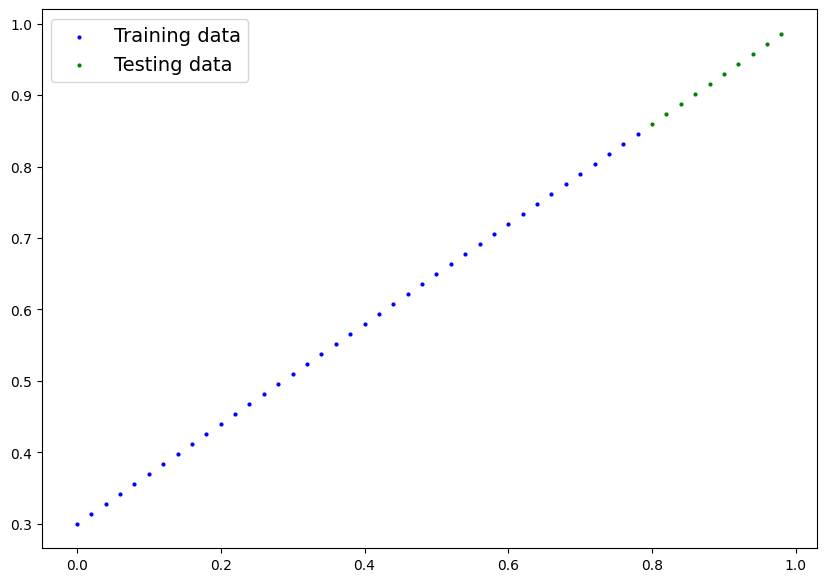

In [50]:
plot_predictions(X_train, y_train, X_test, y_test)

In [51]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias  = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [52]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
model_0.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [53]:
with torch.inference_mode():
    y_preds = model_0(X_test)

print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'Predicted value:\n{y_preds}')

Number of testing samples: 10
Number of predictions made: 10
Predicted value:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


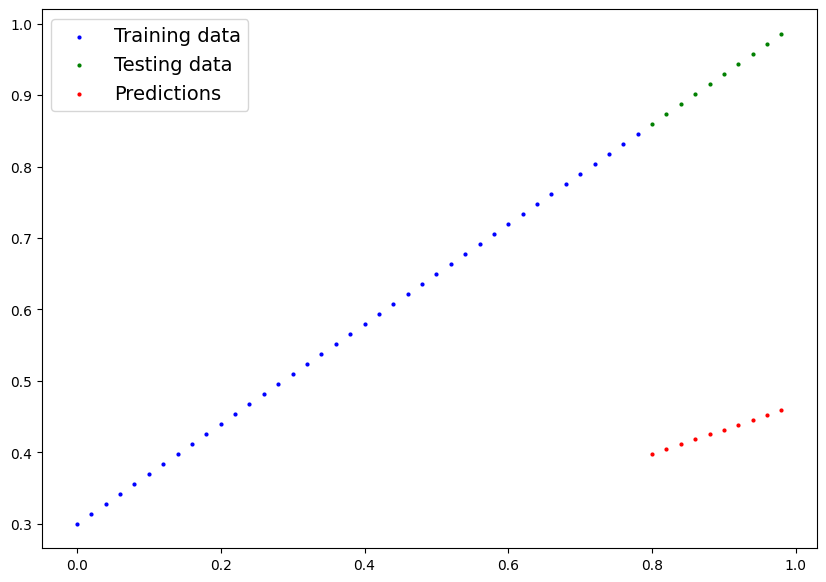

In [54]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [55]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [56]:
print(optimizer.param_groups)


[{'params': [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)], 'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None}]


In [57]:
print(X_train)
print(y_train)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [

In [58]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in tqdm(range(epochs)):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

100%|██████████| 100/100 [00:00<00:00, 887.78it/s]

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.47563618421554565 
Epoch: 10 | MAE Train Loss: 0.17388132214546204 | MAE Test Loss: 0.2866361737251282 
Epoch: 20 | MAE Train Loss: 0.042198795825242996 | MAE Test Loss: 0.0987466350197792 
Epoch: 30 | MAE Train Loss: 0.044207725673913956 | MAE Test Loss: 0.005456471350044012 
Epoch: 40 | MAE Train Loss: 0.02264046110212803 | MAE Test Loss: 0.0635034516453743 
Epoch: 50 | MAE Train Loss: 0.017085570842027664 | MAE Test Loss: 0.04095946624875069 
Epoch: 60 | MAE Train Loss: 0.008707192726433277 | MAE Test Loss: 0.013333350419998169 
Epoch: 70 | MAE Train Loss: 0.0023070916067808867 | MAE Test Loss: 0.0023451626766473055 
Epoch: 80 | MAE Train Loss: 0.002246101852506399 | MAE Test Loss: 0.0020259260199964046 
Epoch: 90 | MAE Train Loss: 0.0018262766534462571 | MAE Test Loss: 0.0037562549114227295 


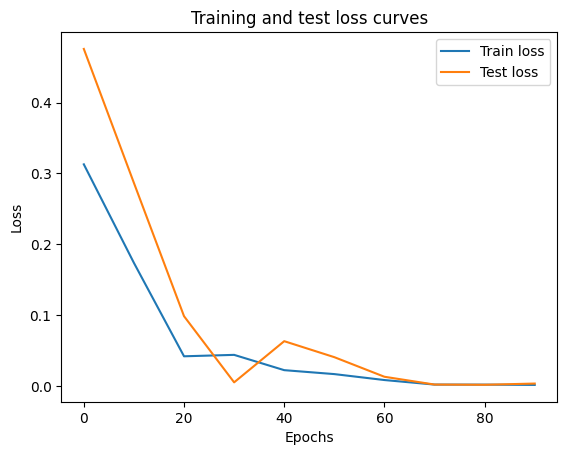

In [59]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Number of testing samples: 10
Number of predictions made: 10
Predicted value:
tensor([[0.8635],
        [0.8776],
        [0.8917],
        [0.9057],
        [0.9198],
        [0.9339],
        [0.9480],
        [0.9620],
        [0.9761],
        [0.9902]])


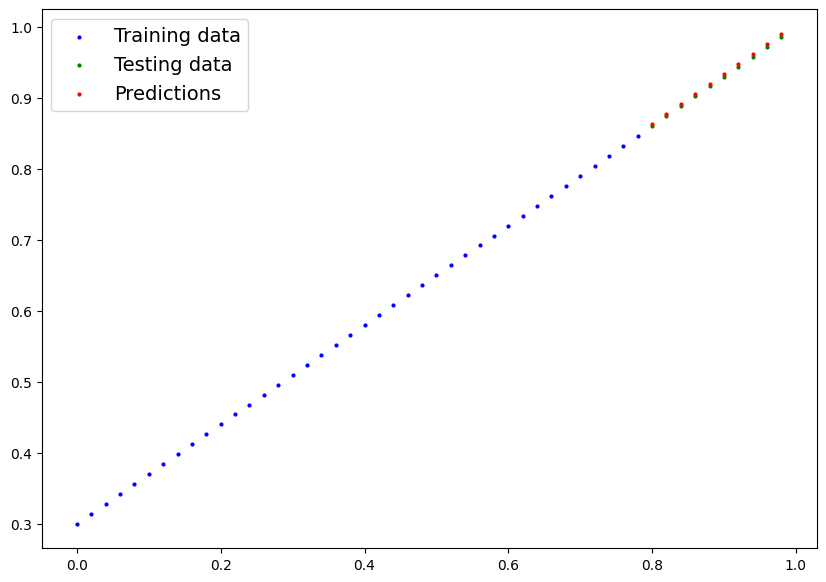

In [60]:
with torch.inference_mode():
    y_preds = model_0(X_test)

print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'Predicted value:\n{y_preds}')

plot_predictions(X_train, y_train, X_test, y_test, y_preds)

there are three main methods to save and load models in Pytorch
1. torch.save() - save pytorch object in python's pickle
2. torch.load() - load a saved Pytorch object
3. torch.nn.Module.load_state_dict() -- allow to load a model's saved state dictiona

In [61]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7037])), ('bias', tensor([0.3006]))])

In [62]:
from pathlib import Path

from matplotlib.pylab import f

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_0.pth
Saving model to: models/01_pytorch_workflow_model_0.pth


In [63]:
model_0 = LinearRegressionModel()
model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'Predicted value:\n{y_preds}')
print(f'Expected value:\n{y_test}')

Number of testing samples: 10
Number of predictions made: 10
Predicted value:
tensor([[0.8635],
        [0.8776],
        [0.8917],
        [0.9057],
        [0.9198],
        [0.9339],
        [0.9480],
        [0.9620],
        [0.9761],
        [0.9902]])
Expected value:
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [64]:
import torch
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [65]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [66]:
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [67]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [68]:
def plot_predictions(train_data, train_labels, test_data, test_labels, prediction=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", s=10, label="Training data")
    plt.scatter(test_data, test_labels, c="green", s=10, label="Testing data")
    plt.legend(prop={"size":14})
    plt.xlabel("Input feature")
    plt.ylabel("Target value")
    plt.title("Training and Testing Data")
    if prediction is not None:
        plt.scatter(test_data, prediction, c="red", s=10, label="Predictions")
        
    plt.show()
        

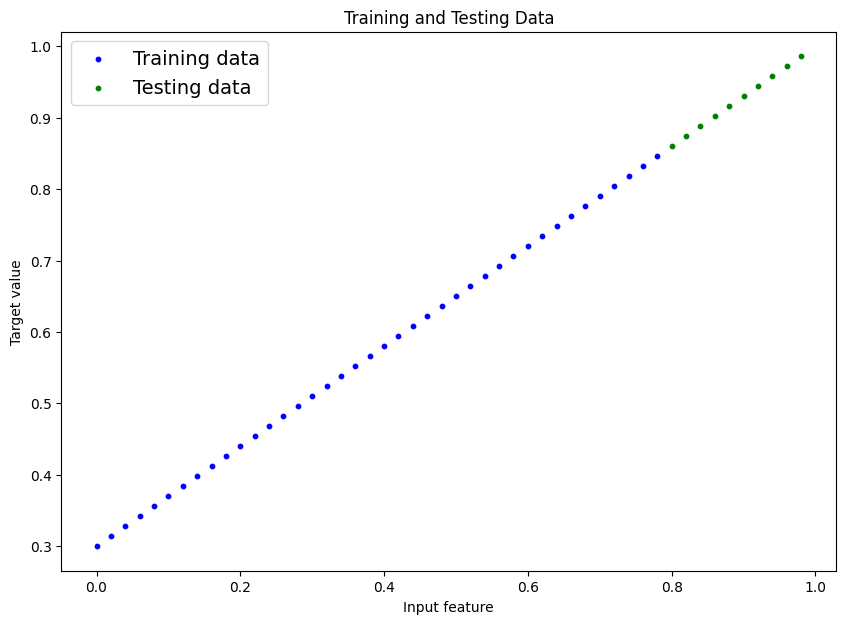

In [69]:
plot_predictions(X_train, y_train, X_test, y_test)

In [70]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        

    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2().to(device)
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [71]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

In [72]:
torch.manual_seed(42)
epochs = 200
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in tqdm(range(epochs)):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



  0%|          | 0/200 [00:00<?, ?it/s]

 83%|████████▎ | 166/200 [00:00<00:00, 828.97it/s]

Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.568547248840332 
Epoch: 10 | MAE Train Loss: 0.4161780774593353 | MAE Test Loss: 0.3795473873615265 
Epoch: 20 | MAE Train Loss: 0.27717819809913635 | MAE Test Loss: 0.19054758548736572 
Epoch: 30 | MAE Train Loss: 0.13817831873893738 | MAE Test Loss: 0.012273055501282215 
Epoch: 40 | MAE Train Loss: 0.06483234465122223 | MAE Test Loss: 0.15948258340358734 
Epoch: 50 | MAE Train Loss: 0.06953977048397064 | MAE Test Loss: 0.19462481141090393 
Epoch: 60 | MAE Train Loss: 0.0556403286755085 | MAE Test Loss: 0.14198976755142212 
Epoch: 70 | MAE Train Loss: 0.0445832721889019 | MAE Test Loss: 0.08211381733417511 
Epoch: 80 | MAE Train Loss: 0.03573416918516159 | MAE Test Loss: 0.06503848731517792 
Epoch: 90 | MAE Train Loss: 0.025599658489227295 | MAE Test Loss: 0.05930420011281967 
Epoch: 100 | MAE Train Loss: 0.015041215345263481 | MAE Test Loss: 0.02901391312479973 
Epoch: 110 | MAE Train Loss: 0.004283720161765814 | MAE Te

100%|██████████| 200/200 [00:00<00:00, 822.10it/s]

Epoch: 170 | MAE Train Loss: 0.0007727757329121232 | MAE Test Loss: 0.0021833181381225586 
Epoch: 180 | MAE Train Loss: 0.00021931901574134827 | MAE Test Loss: 0.0018166005611419678 
Epoch: 190 | MAE Train Loss: 0.0019032970303669572 | MAE Test Loss: 0.0016056358581408858 


Number of testing samples: 10
Number of predictions made: 10
Predicted value:
tensor([[0.8635],
        [0.8776],
        [0.8917],
        [0.9057],
        [0.9198],
        [0.9339],
        [0.9480],
        [0.9620],
        [0.9761],
        [0.9902]])


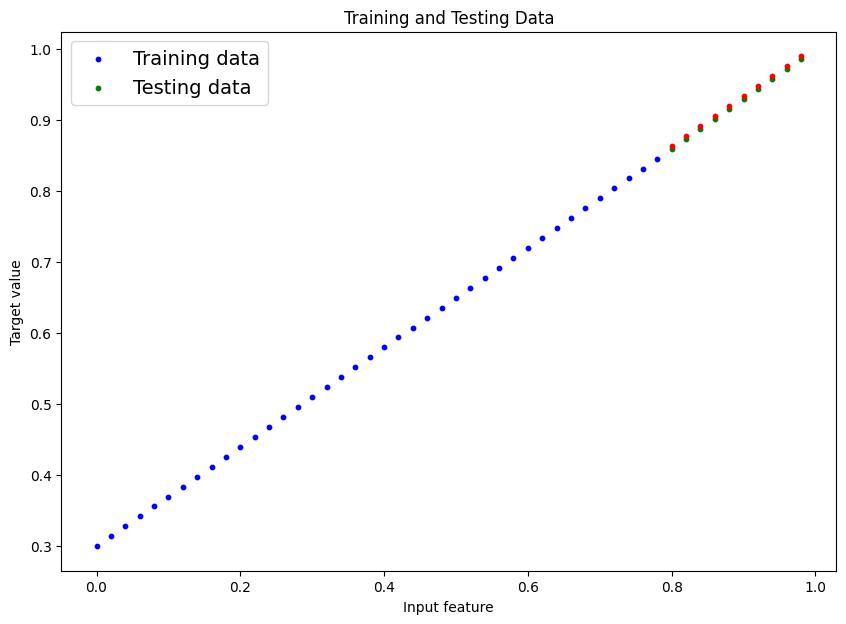

In [74]:
model_1.state_dict()
with torch.inference_mode():
    y_preds = model_0(X_test)

print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'Predicted value:\n{y_preds}')

plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_preds.cpu())
